In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()
data.apply(le.fit_transform(data))

NameError: ignored

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
input = data.drop('Class' ,1)

targets = data['Class']

In [ ]:
input.shape

(284807, 30)

In [ ]:
# 50 % training data 
train_data = input.iloc[:142403]

train_targets = targets.iloc[:142403]


# 20 % validation

validation_data = input.iloc[142403 : 199364]
validation_targets = targets.iloc[142403 : 199364]

# 30 % test data = 

test_data = input.iloc[199364:]
test_targets = targets.iloc[ 199364 :]

In [ ]:
print('===============================\n========= Train Data and Targets =============== ')
print(train_data.shape)

print(train_targets.shape)

print('===============================\n========= Validation Data and Targets =============== ')
print(validation_data.shape)

print(validation_targets.shape)

print('===============================\n========= Train Data and Targets =============== ')
print(test_data.shape)

print(test_targets.shape)

========= Train Data and Targets =============== 
(142403, 30)
(142403,)
========= Validation Data and Targets =============== 
(56961, 30)
(56961,)
========= Train Data and Targets =============== 
(85443, 30)
(85443,)


In [ ]:
print("=" *25)
print(train_data.isnull().sum())

print("=" *25)
print(validation_data.isnull().sum())


print("=" *25)
print(test_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V2

In [ ]:
mean = train_data.mean(axis = 0)

train_data -= mean 
std = train_data.std(axis= 0)

train_data /= std 

validation_data -= mean

validation_data /= std


test_data -= mean

test_data /=std

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
history = model.fit(train_data,
train_targets,
epochs=10,
batch_size=512,
validation_data=(validation_data, validation_targets))

Epoch 1/10
279/279 [==============================] - 1s 3ms/step - loss: 0.4543 - acc: 0.7661 - val_loss: 0.0079 - val_acc: 0.9990
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.0054 - val_acc: 0.9992
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 4/10
279/279 [==============================] - 1s 3ms/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.0049 - val_acc: 0.9993
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.0051 - val_acc: 0.9993
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0056 - val_acc: 0.9991
Epoch 8/10
279/279 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
history_dict = history.history

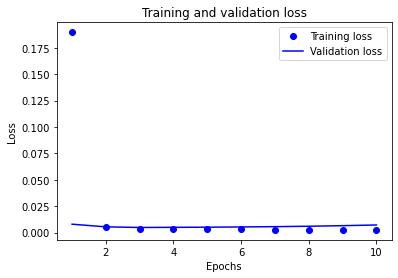

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

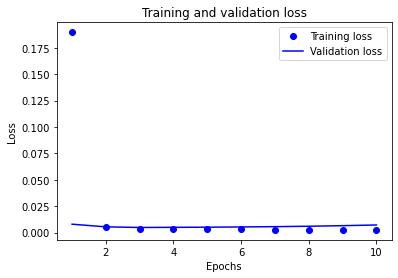

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_targets)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0037 - acc: 0.9995
